# Bepaling van soortelijke warmte van water


# Introductie

Water heeft een enorme buffercapaciteit: je moet veel energie toevoegen om de temperatuur van water een graad te verwarmen. In dit practicum gaan we de soortelijke warmte van water bepalen door een bekende hoeveelheid water te verwarmen met een bekende hoeveelheid energie, en de temperatuurstijging te meten.

# Theorie

Geef hier de natuurkundige achtergrond van het onderwerp. 

De soortelijke warmte van een materiaal wordt gedefinieërd door: 

c = Q / m * dT

Waarbij Q de hoeveelheid warmte is in J, m de massa van het object, en dT het temperatuursverschil. 

# Methode en materialen

## Ontwerp
Een waterbad met bekende massa aan water wordt verwarmd met een elektrisch verwarmingselement dat een bekende hoeveelheid energie levert.
De temperatuur van het water wordt gemeten met een temperatuursensor.
Door de temperatuurstijging als functie van de tijd te meten kan de soortelijke warmte van water worden berekend.


## Materialen
Hieronder staat de lijst van benodigde materialen bij deze proef:
- Maatbeker
- Weegschaal
- Water
- Elektrisch verwarmingselement ($10 \mathrm{\Omega}$, $10 \mathrm{W}$)
- Voedingsbron 
- Thermometer of temperatuursensor
- Stopwatch of timer

```{figure} figures/cwater_setup.jpg
:width: 70%

Een schematische weergave van de opstelling
```

## Procedure
```{exercise}
1. Beschrijf de procedure die nodig is om de soortelijke warmte van water te bepalen.

Procedure:

De maatbeker moet gevuld worden met een bepaalde hoeveelheid water. Het water wordt gewogen met de weegschaal door deze eerst met de lege maatbeker erop op nul te zetten. Vervolgens wordt het water verwarmd met behulp van het elektrisch verwarmingselement op een constante spanning. Een timer moet worden aangezet voor 60 seconden, op elke 10 seconden wordt de temperatuur genoteerd die gemeten wordt met een thermometer. 

2. Geef jouw beschrijving van de procedure aan een ander team, zij verzamelen voor jou de data op basis van de gegevens.
3. Voer het experiment van een ander team uit op basis van hun beschrijving.
4. Analyseer de data die het andere groepje voor jou heeft verzameld.
```


## Veiligheid
We maken gebruik van een $10 \mathrm{\Omega}$, $10 \mathrm{W}$ weerstand.
Deze wordt snel heet.
De bronspanning mag dan ook alleen aan wanneer de weerstand in het water zit.
Raak de weerstand niet aan tijdens het experiment.
Omdat de weerstand in het water zit, kunnen we wel het elektrisch vermogen hoger zetten zonder dat de weerstand oververhit raakt.
Het maximaal vermogen mag $40 \mathrm{W}$ zijn.
Daarbij moet de roerder wel aanstaan om de warmte goed te verdelen.

## Data analyse
Geef kort de data-analysemethode weer.

De gemeten temperaturen worden geplot als functie van de tijd, hier zou een lineaire functie uit moeten komen. Door de vergelijking voor het bepalen van de soortelijke warmte te fitten door de meetpunten heen, kan de soortelijke warmte van water worden bepaald.

# Resultaten


De soortelijke warmte van water is 5813.0 +/- 52.6 J/kg K.
De echte soortelijke warmte van water is 4186 J/kg K.


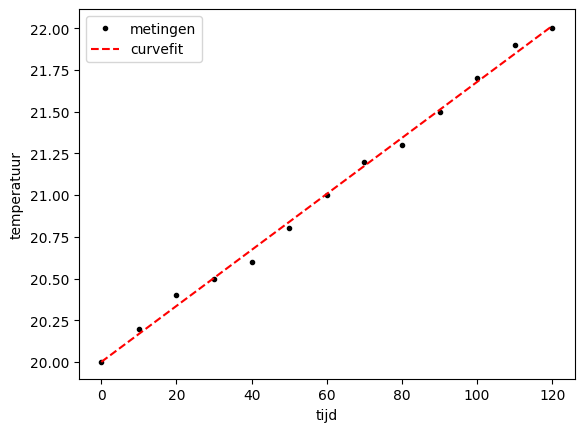

In [12]:
# Hier de data en de analyse
#De massa van het water was 410 gram.
# De correcte waarde van de soortelijke warmte van water is 4186 J/kg*K

import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit

T0 = 20

fileName = 'metingentemp.csv'

data = np.loadtxt(fileName, delimiter=';', skiprows=1)
data = data.T
time = data[0]
temp = data[1]


P = 40 #W, ik ben dus eigenlijk vergeten wat de gebruikte spanning was. Ik herinner me 20 V, dit zou een vermogen geven van 40 W.
# hierbij klopt de waarde ook voor geen meter. Het stond ooit in een excel bestand waarvan ik de geschiedenis kwijt ben..... 
t = 120 #s
m = 0.410 #kg

dtemp = temp-T0


def deltatemp(t, c):
    return (P*t)/(c*m)


val, cov = curve_fit(deltatemp, time, dtemp)
c = val[0]
u_c = np.sqrt(cov[0,0])
print('De soortelijke warmte van water is', np.round(c, 0), '+/-', np.round(u_c, 1), 'J/kg K.')
print('De echte soortelijke warmte van water is 4186 J/kg K.')
time_test = np.linspace(0, 120, 13)
temp_test = (deltatemp(time, c))+T0


plt.figure()
plt.xlabel('tijd')
plt.ylabel('temperatuur')
plt.plot(time, temp,'k.', label='metingen')
plt.plot(time_test, temp_test, 'r--', label='curvefit')
plt.legend()
plt.show()


In [ ]:
# Sla figuren op met  
# 
# plt.savefig("figures/naam.png", dpi=450)



# Discussie en conclusie

Hier een korte discussie en conclusie over de resultaten van het experiment en de implicaties daarvan.

# Discussie
De soortelijke warmte die volgt uit de gemeten waardes is zeer strijdig met de literatuurwaarde van de soortelijke warmte van water. De grootste oorzaak hiervan is helaas dat de gebruikte spanning tijdens het experiment genoteerd werd in een bestand en dit bestand nu verloren is waardoor er grote kans is dat de ingevulde gebruikte spanning niet klopt. 
Aangezien de grafiek er wel kloppend lineair uit ziet en de resultaten realistisch zijn, maar alleen de waarde van c ver van de echte waarde af ligt, is dit zeer waarschijnlijk de reden. 


# Conclusie
Dit experiment is uitgevoerd met het doel om de soortelijke warmte van water te bepalen. Een maatbeker gevuld met 410 gram water is opgewarmd met behulp van een elektrisch verwarmingselement, en de temperatuur wordt om de 10 seconden gemeten met een thermometer gedurende 120 seconden. Uit de data-analyse van de temperatuurstijging volgt dat de soortelijke warmte van water gelijk is aan 5813.0 +/- 52.6 J/kg K. Deze waarde is erg strijdig met de literatuurwaarde van de soortelijke warmte van water, 4186 J/kg K. De oorzaak van deze strijdigheid is dat er geen zekerheid is over het gebruikte vermogen door fouten in het opslaan van data. Een vervolgonderzoek zou verbeterd kunnen worden door beter bestanden op te slaan op de computer, en daarnaast ook voor de zekerheid de waarde op papier noteren.
